In [1]:
import os, sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

from numpy import set_printoptions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB


In [2]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42


In [3]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{exps_dir}/feature1/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

{0: 0.654690618762475, 1: 2.1161290322580646}

In [4]:
feature_selection=dict(np.load(f'{exps_dir}/feature1/feature_model_selection.npz',allow_pickle=True))['feature_model_selection']
feature_selection = {key: value for key, value in feature_selection.item().items()}
feature_selection

{'LR': ['day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_sex',
  'month_incident_date',
  'month_policy_bind_date',
  'property_claim',
  'property_damage',
  'umbrella_limit',
  'vehicle_claim'],
 'LDA': ['capital-gains',
  'day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_sex',
  'month_incident_date',
  'month_policy_bind_date',
  'property_claim',
  'property_damage',
  'vehicle_claim'],
 'DTC': ['age',
  'auto_model',
  'auto_year',
  'day_incident_date',
  'incident_severity',
  'insured_hobbies',
  'month_policy_bind_date',
  'policy_annual_premium',
  'property_claim',
  'total_claim_amount'],
 'RD': ['age',
  'day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'months_as_customer',
  'policy_annual_premium',
  'property_claim',
  'total_claim_amount',
  'vehicle_claim'],
 'KNC': ['policy_state',
  'umbrella_limit',
  'insured_sex',
  'incident_severity',
  'incident_city',
  'property_damage',
  't

### Kết luận:
- Nhóm xây dựng một mạng Netual network ứng dụng kỹ thuật trong học sâu như callbacks, đánh trọng số,.... Nhưng không khắc phục được tình trạng (imbalanced variable).

# 6. Đánh giá và lựa chọn mô hình học máy có giám sát

In [5]:
def check_model(name,model,X,Y,names,results,scoring):
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results=cross_val_score(model,X[feature_selection[name]],Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=scoring.title()+" %s: %.3f%% (%.3f%%)"%(name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)       
    return 

Accuracy LR: 73.636% (4.076%)
Accuracy LDA: 80.486% (3.445%)
Accuracy DTC: 82.010% (2.309%)
Accuracy RD: 79.876% (3.511%)
Accuracy KNC: 76.365% (3.097%)
Accuracy NB: 77.140% (3.264%)
Accuracy SVM: 77.291% (2.615%)
Accuracy NN: 82.010% (0.819%)
Accuracy BG: 76.672% (1.764%)


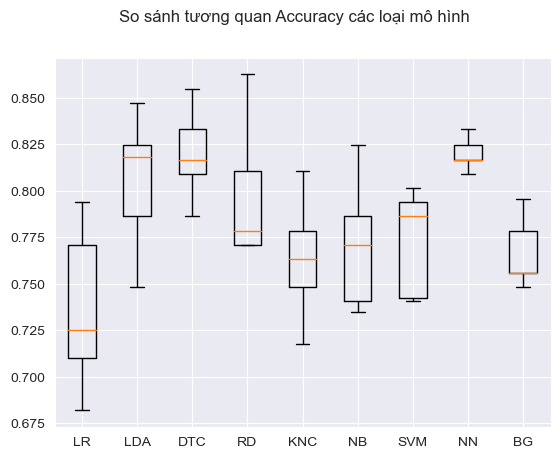

Precision LR: 46.507% (8.845%)
Precision LDA: 64.952% (11.344%)
Precision DTC: 61.420% (6.112%)
Precision RD: 63.211% (13.311%)
Precision KNC: 0.000% (0.000%)
Precision NB: 51.952% (9.164%)
Precision SVM: 50.872% (8.424%)
Precision NN: 58.972% (7.436%)
Precision BG: 50.582% (6.855%)


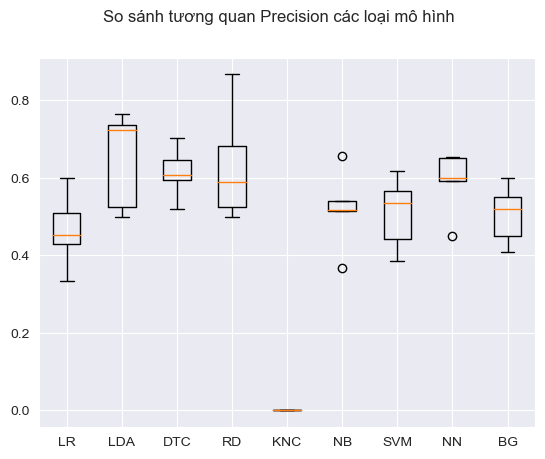

Recall LR: 74.328% (4.504%)
Recall LDA: 40.536% (5.566%)
Recall DTC: 59.509% (6.514%)
Recall RD: 40.631% (7.484%)
Recall KNC: 0.000% (0.000%)
Recall NB: 56.140% (5.036%)
Recall SVM: 71.375% (7.425%)
Recall NN: 48.957% (5.159%)
Recall BG: 36.491% (3.342%)


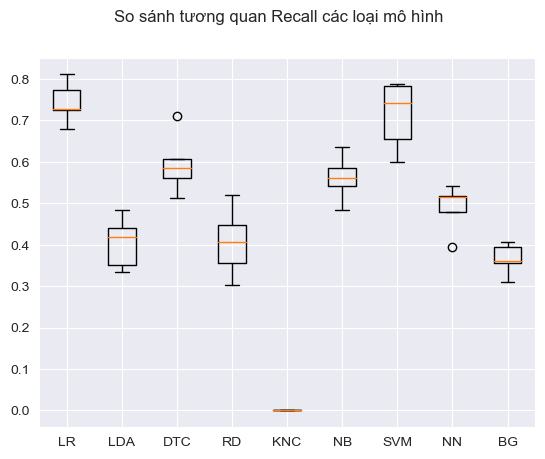

F1 LR: 56.980% (8.069%)
F1 LDA: 49.474% (6.092%)
F1 DTC: 58.887% (6.225%)
F1 RD: 48.645% (6.846%)
F1 KNC: 0.000% (0.000%)
F1 NB: 53.591% (6.631%)
F1 SVM: 59.337% (8.279%)
F1 NN: 53.016% (4.552%)
F1 BG: 42.329% (4.439%)


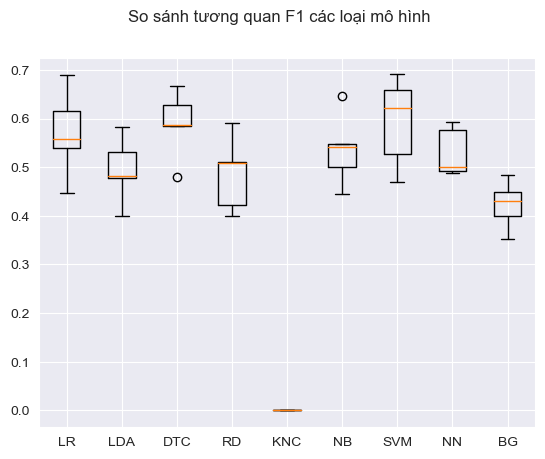

In [6]:
num_folds=5
seed=7
models=[]

models.append(('KNC',KNeighborsClassifier(n_neighbors=100)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(class_weight=class_weights_dict)))
models.append(('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)))
models.append(('GD',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)))
#models.append(('Naive',MultinomialNB()))


RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight=class_weights_dict,
                                )

results=[]
names=[]
scorings=['accuracy','precision','recall','f1']
#check_model('LR',LogisticRegression(class_weight=class_weights_dict),X_logistic,Y,names,results,scorings)
#check_model('LDA',LinearDiscriminantAnalysis(),X_linear,Y,names,results,scorings)
#check_model('CART',DecisionTreeClassifier(class_weight=class_weights_dict),X_decision,Y,names,results,scorings)
#check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),X_forest,Y,names,results,scorings)



for scoring in scorings:
    check_model('LR',LogisticRegression(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('LDA',LinearDiscriminantAnalysis(),x_train,y_train,names,results,scoring)
    check_model('DTC',DecisionTreeClassifier(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('KNC',KNeighborsClassifier(n_neighbors=100),x_train,y_train,names,results,scoring)
    check_model('NB',GaussianNB(),x_train,y_train,names,results,scoring)
    check_model('SVM',SVC(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),x_train,y_train,names,results,scoring)
    check_model('BG',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),x_train,y_train,names,results,scoring)
    fig=plt.figure()
    fig.suptitle(f'So sánh tương quan {scoring.title()} các loại mô hình')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    results=[]
    names=[]


## 2 Mô hình đạt điểm cao nhất là:
    -RD: RandomForest
    -DTC: DecisionTreeClassifer
    -SVM: Support Vector Machine


In [7]:
evaluate_result={}

### Mô hình SVM
      -Tỉ lệ đoán sai ở lớp bị đánh trọng số thấp cao

In [18]:
supervied_features=x_train[feature_selection['SVM']]
supervied_target=y_train
model1=SVC(class_weight=class_weights_dict)
model1.fit(supervied_features,supervied_target)

SVC(class_weight={0: 0.654690618762475, 1: 2.1161290322580646})

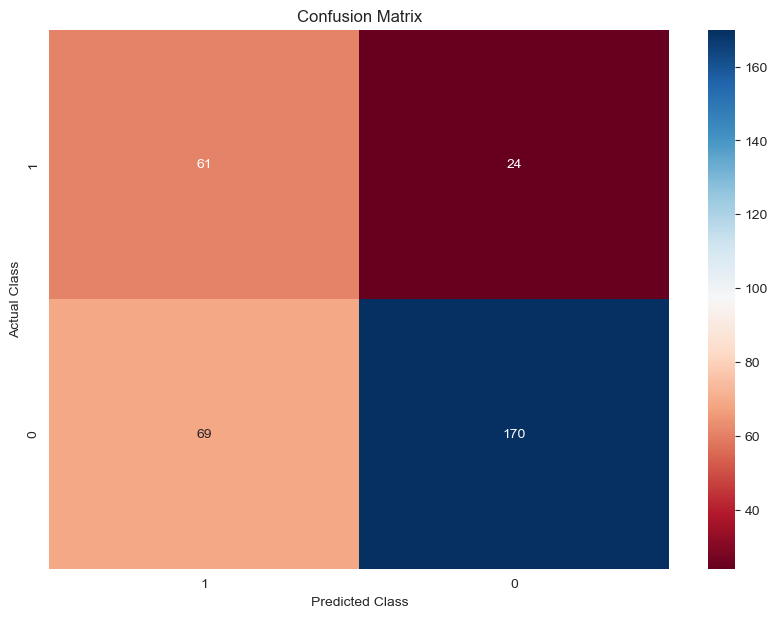

              precision    recall  f1-score   support

           0       0.88      0.71      0.79       239
           1       0.47      0.72      0.57        85

    accuracy                           0.71       324
   macro avg       0.67      0.71      0.68       324
weighted avg       0.77      0.71      0.73       324



In [19]:
predictions = model1.predict(x_test[feature_selection['SVM']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['SVM']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### DecisionTreeClassifer

In [22]:
supervied_features=x_train[feature_selection['DTC']]
supervied_target=y_train
model2=DecisionTreeClassifier(class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

DecisionTreeClassifier(class_weight={0: 0.654690618762475,
                                     1: 2.1161290322580646})

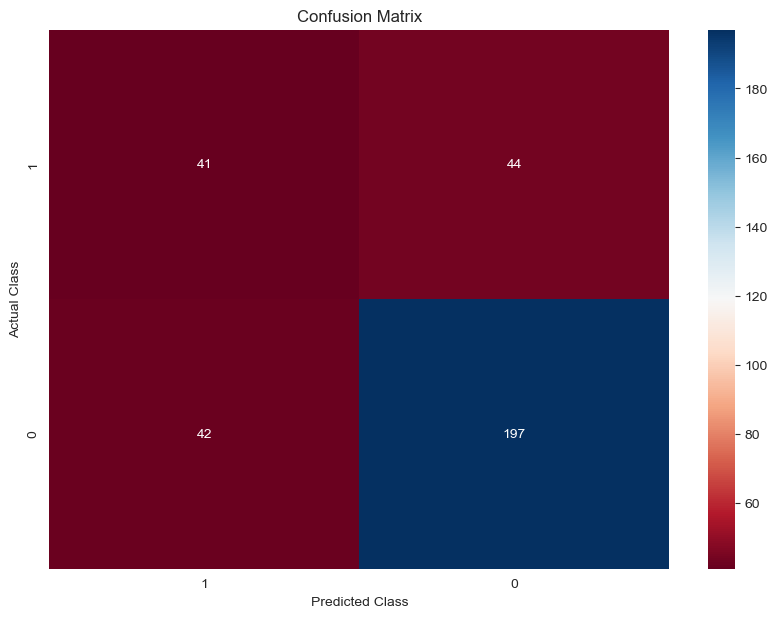

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       239
           1       0.49      0.48      0.49        85

    accuracy                           0.73       324
   macro avg       0.66      0.65      0.65       324
weighted avg       0.73      0.73      0.73       324



In [23]:
predictions = model2.predict(x_test[feature_selection['DTC']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['DecisionTreeClassifer']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

### Mô hình Random Forest
    - Có dấu hiệu tích cực hơn SVM

In [24]:
supervied_features=x_train[feature_selection['RD']]
supervied_target=y_train
model3=RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict)
model3.fit(supervied_features,supervied_target)

RandomForestClassifier(class_weight={0: 0.654690618762475,
                                     1: 2.1161290322580646},
                       random_state=42)

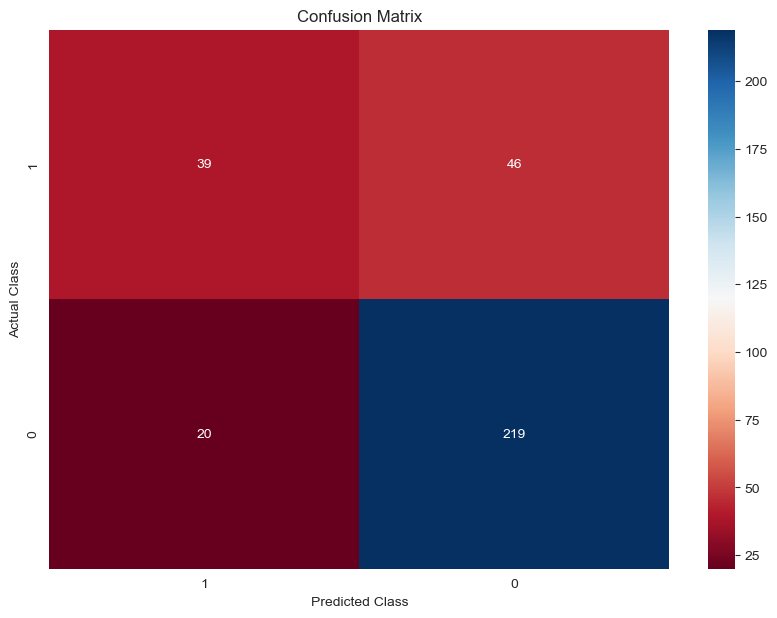

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       239
           1       0.66      0.46      0.54        85

    accuracy                           0.80       324
   macro avg       0.74      0.69      0.71       324
weighted avg       0.78      0.80      0.78       324



In [25]:
predictions = model3.predict(x_test[feature_selection['RD']])

# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['RD']=classification_report(y_test, predictions)

# Hiển thị báo cáo phân loại để xem thêm thông tin chi tiết
print(classification_report(y_test, predictions))

In [26]:
for x,y in evaluate_result.items():
    print(x)
    print(y)

LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.62      0.73       239
           1       0.42      0.76      0.54        85

    accuracy                           0.66       324
   macro avg       0.65      0.69      0.64       324
weighted avg       0.76      0.66      0.68       324

GaussianNB
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       239
           1       0.41      0.47      0.44        85

    accuracy                           0.68       324
   macro avg       0.60      0.61      0.61       324
weighted avg       0.70      0.68      0.69       324

MultinomialNB
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       239
           1       0.23      0.19      0.21        85

    accuracy                           0.62       324
   macro avg       0.48      0.48      0.48       324
weighted avg       0.60      0

In [27]:
def check_result(prediction):
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [28]:
def check_output(stt,model, X_test, Y_test):
    print(f"Lần thứ {stt}: ")
    indx = rd.randint(0, X_test.shape[0] - 1)  # Đảm bảo indx nằm trong giới hạn của DataFrame
    sample = X_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(Y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        return True
    else: return False
    
    

In [29]:
n_check=10
solandung=0
for i in range(n_check):
    if check_output(i+1,model1, x_test[feature_selection['SVM']], y_test):
        solandung+=1


Lần thứ 1: 
True: N
Predicted: Y
----------------------------
Lần thứ 2: 
True: N
Predicted: N
----------------------------
Lần thứ 3: 
True: N
Predicted: N
----------------------------
Lần thứ 4: 
True: N
Predicted: N
----------------------------
Lần thứ 5: 
True: N
Predicted: N
----------------------------
Lần thứ 6: 
True: N
Predicted: N
----------------------------
Lần thứ 7: 
True: N
Predicted: N
----------------------------
Lần thứ 8: 
True: Y
Predicted: N
----------------------------
Lần thứ 9: 
True: Y
Predicted: N
----------------------------
Lần thứ 10: 
True: Y
Predicted: N
----------------------------


In [30]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/n_check)*100}% tổng lần dự đoán")

Số lần dự đoán đúng: 6 chiếm khoảng 60.0% tổng lần dự đoán


In [31]:
solandung=0
hopdonggianlan=0
for indx in range(len(x_test)):
    sample = x_test[feature_selection['RD']].iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model1.predict(sample)
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        solandung+=1
        if Y_check=='Y':
            hopdonggianlan+=1
    


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------


True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------


In [32]:
print(f"Số lần dự đoán đúng trong lan kiểm tra: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")
print(f"Số lần phát hiện hợp đồng gian lận trong lan kiểm tra: {hopdonggianlan} chiếm khoảng {(hopdonggianlan/len(x_test))*100}% tổng lần dự đoán")


Số lần dự đoán đúng trong lan kiểm tra: 258 chiếm khoảng 79.62962962962963% tổng lần dự đoán
